In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs

In [6]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

copy_df = df.copy()

In [7]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [8]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 86.20089424535107
20 / 248 ==> 80.1705739078049
30 / 248 ==> 81.95477790101211
40 / 248 ==> 82.30251422078611
50 / 248 ==> 85.09302024605141
60 / 248 ==> 80.61117770218516
70 / 248 ==> 82.62980976660278
80 / 248 ==> 80.92286069078078
90 / 248 ==> 87.98982557132106
100 / 248 ==> 81.3243169161389
110 / 248 ==> 81.24607864232141
120 / 248 ==> 80.69039295721323
130 / 248 ==> 84.45601411571025
140 / 248 ==> 80.13257435053396
150 / 248 ==> 87.20236825169172
160 / 248 ==> 87.54839185680639
170 / 248 ==> 87.6864593766172
180 / 248 ==> 80.29038377847056
190 / 248 ==> 80.7000096056925
200 / 248 ==> 85.32039817993619
210 / 248 ==> 84.67584354399158
220 / 248 ==> 82.83255412286427
230 / 248 ==> 80.06303745804921
240 / 248 ==> 83.01021694967963
248 / 248 ==> 82.65854590426234


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,6.0,4.0,6.0,2.0,2.0,2.0,4.0,0.0,0.0,4.0,...,0.0,4.0,6.0,6.0,3.0,5.0,4.0,4.0,4.0,6.0
1,3.0,4.0,3.0,6.0,6.0,4.0,4.0,3.0,4.0,4.0,...,4.0,4.0,2.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0
2,1.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,...,2.0,0.0,4.0,5.0,3.0,5.0,5.0,1.0,4.0,5.0
3,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,4.0,3.0,...,3.0,5.0,1.0,0.0,0.0,5.0,3.0,1.0,1.0,0.0
4,1.0,6.0,6.0,6.0,6.0,1.0,3.0,5.0,4.0,1.0,...,4.0,0.0,0.0,4.0,2.0,3.0,6.0,5.0,3.0,2.0


In [9]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,4.0,2.0,4.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,...,3.0,2.0,4.0,4.0,5.0,6.0,2.0,2.0,2.0,4.0
2018-05-01 03:00:00,3.0,2.0,3.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,4.0
2018-05-01 06:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,...,1.0,6.0,6.0,3.0,6.0,3.0,3.0,2.0,6.0,3.0
2018-05-01 09:00:00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,...,1.0,6.0,2.0,4.0,4.0,6.0,1.0,2.0,2.0,4.0
2018-05-01 12:00:00,2.0,1.0,1.0,1.0,1.0,2.0,4.0,3.0,5.0,2.0,...,5.0,6.0,6.0,5.0,7.0,4.0,1.0,3.0,4.0,7.0


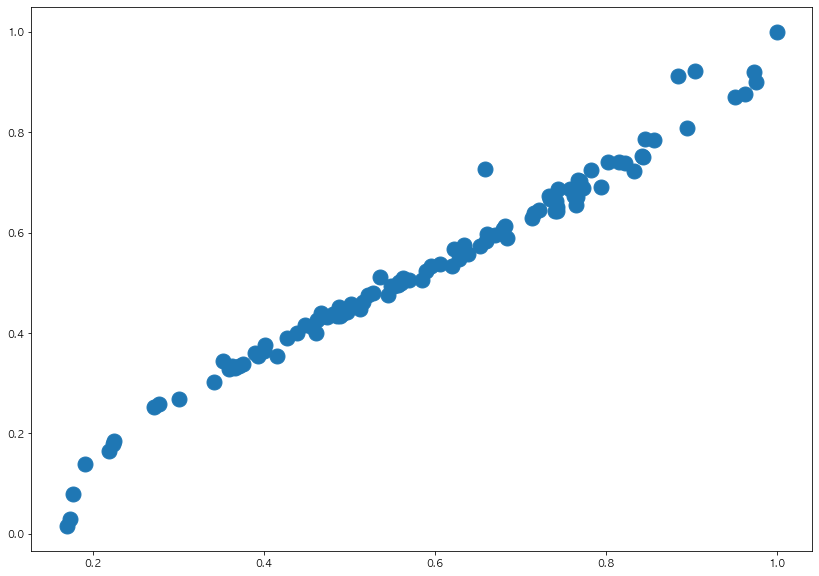

In [10]:
X = contribution_df.sum()
Y = df.sum().round()

X = X / X.max()
Y = (Y / Y.max())

plt.figure(figsize=(14,10))
plt.scatter(X, Y, s=224)

In [11]:
FM_df = pd.DataFrame()
FM_df['M'] = X
FM_df['F'] = Y
FM_df.head()

,M,F
아파트1-104-1206,0.400409,0.363436
아파트1-104-303,0.366303,0.330396
아파트1-104-1307,0.415416,0.354626
아파트1-104-1208,0.169850,0.015419
아파트1-104-408,0.219645,0.165198


In [12]:
fmKMeans = KMeans(n_clusters=round(mt.sqrt(len(FM_df) / 2)))
fmKMeans.fit(FM_df.values)

labels = fmKMeans.labels_
FM_df['labels'] = labels
FM_df.head()

,M,F,labels
아파트1-104-1206,0.400409,0.363436,6
아파트1-104-303,0.366303,0.330396,6
아파트1-104-1307,0.415416,0.354626,6
아파트1-104-1208,0.169850,0.015419,2
아파트1-104-408,0.219645,0.165198,2


In [13]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

NameError: name 'cc' is not defined

In [ ]:
plt.figure(figsize=(14,10))

for label in set(FM_df['labels']):
    _fm = FM_df[FM_df['labels'] == label]
    plt.scatter(_fm['M'], _fm['F'], s=224, label="기여도 그룹 {} / (가구 수: {})".format(label, len(_fm)))
    
plt.legend()

In [ ]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
label_group = set(labels)

for group in label_group:
    group_cols = FM_df[FM_df['labels'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc.head()

In [ ]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T

# Sorting
cc_cols = cc_cols[cc_pattern.sum().argsort().values]
_labels = np.array(list(set(labels)))[cc_pattern.sum().argsort().values]

cc_pattern.head()

In [ ]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(_labels):
    cols = df.columns
    _group_cols = cols[(FM_df['labels'] == group).values]

    ax[group_idx].plot(df[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].plot(df[_group_cols].mean(axis=1), linewidth=1.5, color='b', alpha=0.3)
    ax[group_idx].text(0.02, 0.925, cc_cols[group_idx], 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.925, "클러스터링 패턴 기준 총 사용량 : {} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.825, "가구 평균 사용량 : {} kWh".format(round(df[_group_cols].sum().mean())),
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()